In [57]:
import os
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [87]:
import tensorflow as tf
import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Activation,Dropout,Conv2D,MaxPool2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [96]:
img_width, img_height = 150,150
batch_size = 32 #32,64,128
epochs = 15

In [60]:
from zipfile import ZipFile
file_name = '/soil.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [61]:
path = "/content/Soil_Dataset"

In [63]:
train_dir = "/content/Soil_Dataset/Train"
test_dir = "/content/Soil_Dataset/Test"

In [65]:
from glob import glob
glob("/content/Soil_Dataset/Test/*/")

['/content/Soil_Dataset/Test/Alluvial_Soil/',
 '/content/Soil_Dataset/Test/Red_Soil/',
 '/content/Soil_Dataset/Test/Clay_Soil/',
 '/content/Soil_Dataset/Test/Black_Soil/']

In [67]:
labels = ['Alluvial_Soil', 'Red_Soil', 'Clay_Soil', 'Black_Soil']

In [68]:
def show_soil(path):
    im = cv2.imread(path)
    im_resized = cv2.resize(im, (img_height,img_width), interpolation=cv2.INTER_LINEAR)
    
    plt.imshow(cv2.cvtColor(im_resized,cv2.COLOR_BGR2RGB))
    plt.show()

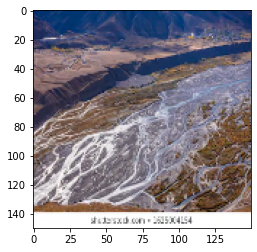

In [79]:
show_soil("/content/Soil_Dataset/Train/Alluvial_Soil/Alluvial_55.jpg")

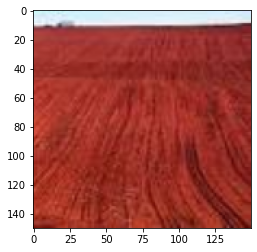

In [83]:
show_soil("/content/Soil_Dataset/Train/Red_Soil/Red_55.jpg")

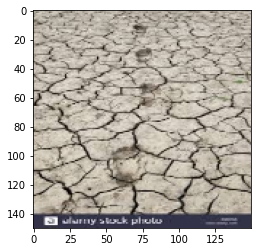

In [80]:
show_soil("/content/Soil_Dataset/Train/Clay_Soil/Clay_55.jpg")

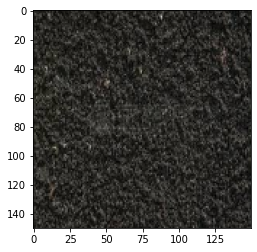

In [82]:
show_soil("/content/Soil_Dataset/Train/Black_Soil/Black_55.jpg")

In [84]:
# image preprocessing

trainGen = ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
testGen = ImageDataGenerator(rescale=1./255)

In [88]:
train = trainGen.flow_from_directory(train_dir,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=batch_size,shuffle=True)
test = testGen.flow_from_directory(test_dir,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=batch_size)

Found 715 images belonging to 4 classes.
Found 188 images belonging to 4 classes.


In [90]:
model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(img_height,img_width,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,3,3,padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,3,3,padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Dense(32,activation="relu"))
model.add(Flatten())
model.add(Dense(32,activation="relu"))

model.add(Dense(4,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 64)        73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 32)         

In [92]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [97]:
model.fit(train,epochs=epochs,validation_data=test)

Epoch 1/15
23/23 [==============================] - 30s 1s/step - loss: 0.2845 - accuracy: 0.8979 - val_loss: 0.4113 - val_accuracy: 0.8032
Epoch 2/15
23/23 [==============================] - 30s 1s/step - loss: 0.2624 - accuracy: 0.9035 - val_loss: 0.3777 - val_accuracy: 0.8404
Epoch 3/15
23/23 [==============================] - 30s 1s/step - loss: 0.2327 - accuracy: 0.9203 - val_loss: 0.3229 - val_accuracy: 0.8830
Epoch 4/15
23/23 [==============================] - 30s 1s/step - loss: 0.2427 - accuracy: 0.9119 - val_loss: 0.5860 - val_accuracy: 0.7606
Epoch 5/15
23/23 [==============================] - 30s 1s/step - loss: 0.2448 - accuracy: 0.9063 - val_loss: 0.3564 - val_accuracy: 0.8830
Epoch 6/15
23/23 [==============================] - 30s 1s/step - loss: 0.2144 - accuracy: 0.9301 - val_loss: 0.3265 - val_accuracy: 0.8989
Epoch 7/15
23/23 [==============================] - 30s 1s/step - loss: 0.2321 - accuracy: 0.9049 - val_loss: 0.2719 - val_accuracy: 0.8883
Epoch 8/15
23/23 [==

In [109]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [110]:
train_loss=model.history.history['loss']
train_loss

[0.2845005393028259,
 0.26244160532951355,
 0.2326878011226654,
 0.24274951219558716,
 0.2448362559080124,
 0.21441155672073364,
 0.23207664489746094,
 0.2333836704492569,
 0.20905910432338715,
 0.19823585450649261,
 0.20903228223323822,
 0.20623616874217987,
 0.15019920468330383,
 0.20723021030426025,
 0.20974281430244446]

In [111]:
train_accu = model.history.history['accuracy']
train_accu

[0.8979020714759827,
 0.903496503829956,
 0.9202797412872314,
 0.9118881225585938,
 0.9062936902046204,
 0.9300699234008789,
 0.9048951268196106,
 0.9090909361839294,
 0.9174824953079224,
 0.9300699234008789,
 0.9342657327651978,
 0.9174824953079224,
 0.9510489702224731,
 0.9258741140365601,
 0.9216783046722412]

In [112]:
test_loss = model.history.history['val_loss']
test_loss

[0.41129693388938904,
 0.37770548462867737,
 0.32286950945854187,
 0.5859970450401306,
 0.35641995072364807,
 0.3264780342578888,
 0.27192938327789307,
 0.2971801459789276,
 0.2638372778892517,
 0.3787323534488678,
 0.35944586992263794,
 0.3344784080982208,
 0.28652423620224,
 0.23657673597335815,
 0.2943366765975952]

In [113]:
test_accu = model.history.history['val_accuracy']
test_accu

[0.8031914830207825,
 0.8404255509376526,
 0.8829787373542786,
 0.7606382966041565,
 0.8829787373542786,
 0.8989361524581909,
 0.8882978558540344,
 0.8936170339584351,
 0.8989361524581909,
 0.8404255509376526,
 0.8723404407501221,
 0.8829787373542786,
 0.8882978558540344,
 0.914893627166748,
 0.8989361524581909]

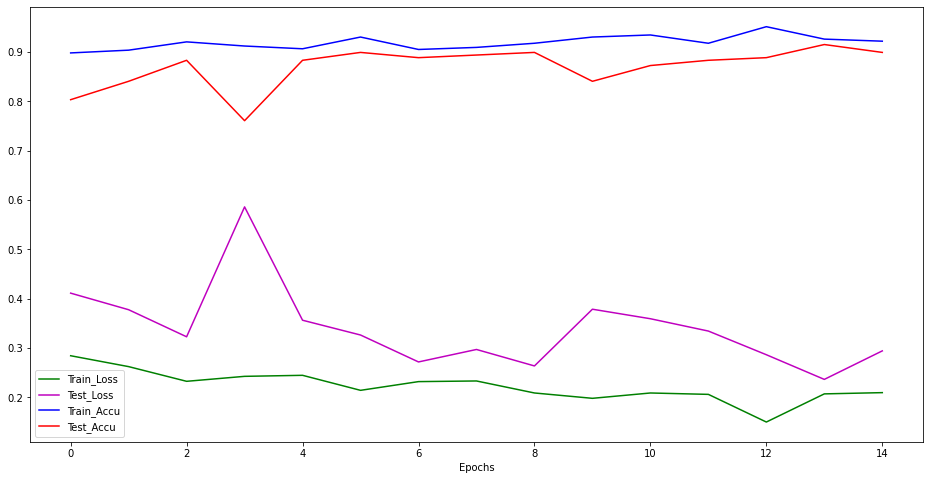

In [114]:
plt.figure(figsize=(16,8))
plt.plot(np.arange(epochs),train_loss,color='g',label='Train_Loss')
plt.plot(np.arange(epochs),test_loss,color='m',label='Test_Loss')
plt.plot(np.arange(epochs),train_accu,color='b',label='Train_Accu')
plt.plot(np.arange(epochs),test_accu,color='r',label='Test_Accu')
plt.legend()
plt.xlabel('Epochs')
plt.show()

In [115]:
loss,accu = model.evaluate(test)
print("Test Loss: ",loss)
print("Test Accu: ",accu) 

6/6 [==============================] - 2s 312ms/step - loss: 0.2943 - accuracy: 0.8989
Test Loss:  0.2943366765975952
Test Accu:  0.8989361524581909


In [118]:
labels

['Alluvial_Soil', 'Red_Soil', 'Clay_Soil', 'Black_Soil']

In [119]:
def predict_soil(path):
    im = cv2.imread(path)
    im_resized = cv2.resize(im, (img_height,img_width), interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resized,cv2.COLOR_BGR2RGB))
    plt.show()

    img_pred = image.load_img(path,target_size=(img_height,img_width))
    img_pred = image.img_to_array(img_pred)
    img = np.expand_dims(img_pred,axis=0)
    result = model.predict_classes(img)
    prob = model.predict_proba(img)
    print('Predicted Class:',result)
    print('Probability :{}'.format(prob[0]))
    if result[0]==0:
        prediction = "Alluvial_Soil"
    elif result[0]==1:
        prediction = "Red_Soil"
    elif result[0]==2:
        prediction = "Clay_Soil"
    else:
        prediction = "Black_Soil"
    
    print("Predicted Class: ",prediction)

In [121]:
from keras_preprocessing import image

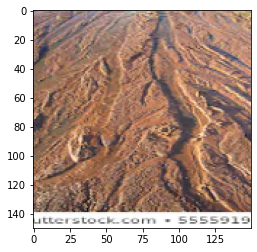

Predicted Class: [0]
Probability :[1. 0. 0. 0.]
Predicted Class:  Alluvial_Soil


In [124]:
predict_soil('/content/Soil_Dataset/Test/Alluvial_Soil/Alluvial_14.jpg')

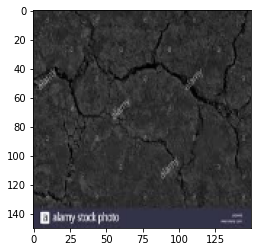

Predicted Class: [2]
Probability :[0. 0. 1. 0.]
Predicted Class:  Clay_Soil


In [127]:
predict_soil('/content/Soil_Dataset/Test/Black_Soil/Black_46.jpg')

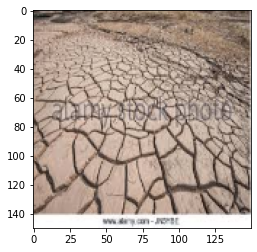

Predicted Class: [2]
Probability :[5.184613e-29 0.000000e+00 1.000000e+00 0.000000e+00]
Predicted Class:  Clay_Soil


In [128]:
predict_soil('/content/Soil_Dataset/Test/Clay_Soil/Clay_4.jpg')

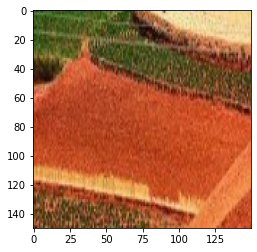

Predicted Class: [1]
Probability :[0. 1. 0. 0.]
Predicted Class:  Red_Soil


In [134]:
predict_soil('/content/Soil_Dataset/Test/Red_Soil/Red_19.jpg')